In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv',sep=',')

C:\Users\Raquel Dotta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[(0, 90)]

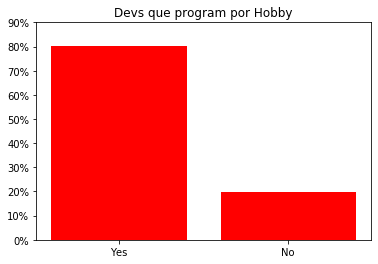

In [36]:
from matplotlib.ticker import PercentFormatter

srx = df['Hobbyist'].unique()
sry = df['Hobbyist'].value_counts(normalize=True)*100
plt.title('Devs que program por Hobby')

fig = plt.figure(1, (10,8))
ay = fig.add_subplot(1,1,1)

plt.bar(srx,sry, color="red")
ay.yaxis.set_major_formatter(PercentFormatter())
ay.set(ylim=(0, 90))

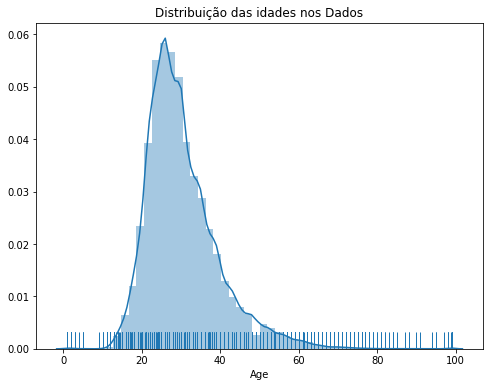

In [8]:
x = df.dropna(subset=['Age'])
x = x["Age"]
plt.figure(figsize=(8,6))
plt.title('Distribuição das idades nos Dados')
ax = sns.distplot(x,rug=True, hist=True)

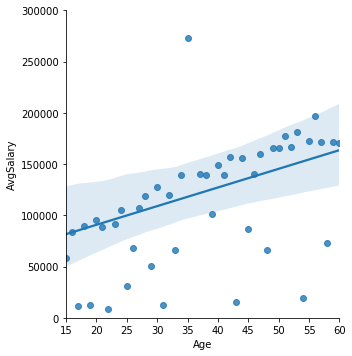

In [51]:
x = df.dropna(subset=['Age','ConvertedComp'])
x = x.groupby("Age")['ConvertedComp'].mean()
x1 = pd.DataFrame(data=x.values, columns=["AvgSalary"])
x1.index.name = 'Age'
x1 = x1.reset_index()
g = sns.lmplot("Age",'AvgSalary', x1, )
g.set(ylim=(0, 300000), xlim = (15, 60))

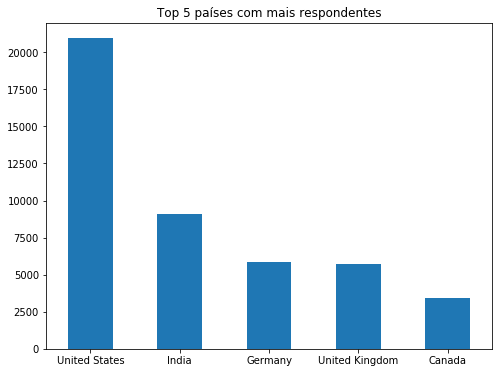

In [37]:
df_percountry = df['Country'].value_counts()
df_percountry = df_percountry.nlargest()
plt.figure(figsize=(8,6))
plt.title('Top 5 países com mais respondentes')
df_percountry.plot.bar(rot=0)

In [38]:
df['JavaScript'] = df['LanguageWorkedWith'].str.findall("JavaScript")
df['Python'] = df['LanguageWorkedWith'].str.findall("Python")

In [39]:
df['knowlegde'] = df['Python'] + df['JavaScript']

(-1.1202170352559881,
 1.115364795523179,
 -1.2117664860586326,
 1.1053222136218397)

<Figure size 720x576 with 0 Axes>

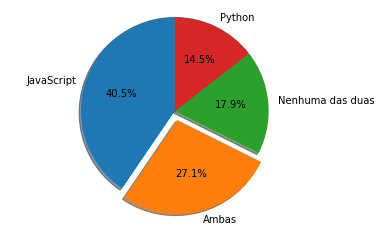

In [40]:
ct = df['knowlegde'].value_counts(normalize=True)
labels = 'JavaScript','Ambas', 'Nenhuma das duas', 'Python'
explode = (0, 0.1, 0, 0) 
fig = plt.figure(1, (10,8))
fig1, ax1 = plt.subplots()
ax1.pie(ct, explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

In [73]:
lved = df['Employment'].value_counts(normalize=True)
lved

Employed full-time                                      0.739152
Independent contractor, freelancer, or self-employed    0.097624
Not employed, but looking for work                      0.064234
Employed part-time                                      0.051261
Not employed, and not looking for work                  0.043622
Retired                                                 0.004106
Name: Employment, dtype: float64

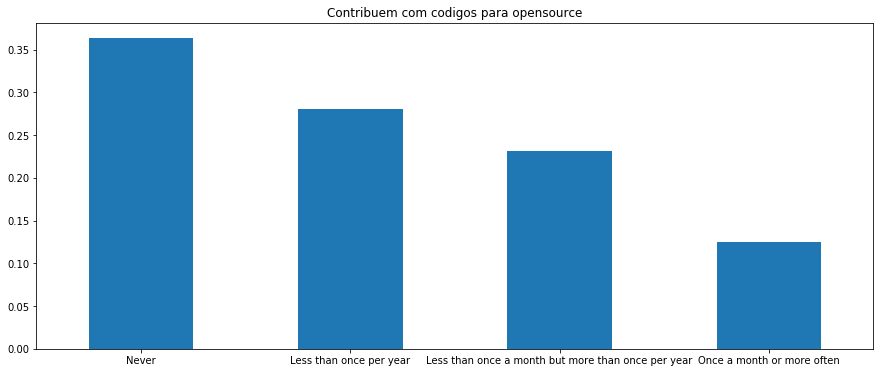

In [93]:
x = df.dropna(subset=['OpenSourcer'])
x = x["OpenSourcer"].value_counts(normalize=True)
plt.figure(figsize=(15,6))
plt.title('Contribuem com codigos para opensource')
x.plot.bar(rot=0, )